### Traffic simulation with OSMnx and UXsim
- [OSMnx](https://www.github.com/gboeing/osmnx)
- [UXsim](https://www.github.com/toruseo/uxsim)

In [1]:
import osmnx as ox
import networkx as nx
import random
import uxsim
from IPython.display import display, Image
from shapely.geometry import Polygon

In [2]:
city_name = "Rotterdam"
surrounding_area_name = "South Holland"

- Rotterdam: https://www.keene.edu/campus/maps/tool/?coordinates=4.4990746%2C%2051.9762347%0A4.4782925%2C%2051.9761290%0A4.4496103%2C%2051.9699249%0A4.4198962%2C%2051.9593188%0A4.3244782%2C%2051.9397037%0A4.3090174%2C%2051.9189005%0A4.3074716%2C%2051.8962450%0A4.3203072%2C%2051.8937360%0A4.3354215%2C%2051.8630147%0A4.3500308%2C%2051.8505497%0A4.3707192%2C%2051.8439906%0A4.3919387%2C%2051.8418568%0A4.4114458%2C%2051.8430026%0A4.4589756%2C%2051.8308224%0A4.4948745%2C%2051.8359273%0A4.5239904%2C%2051.8294898%0A4.5493683%2C%2051.8313068%0A4.5780828%2C%2051.8237958%0A4.6195911%2C%2051.8511542%0A4.6459819%2C%2051.8642957%0A4.6339985%2C%2051.8706785%0A4.6194791%2C%2051.8886225%0A4.6422223%2C%2051.8910727%0A4.6477144%2C%2051.9153997%0A4.6208137%2C%2051.9346689%0A4.6365819%2C%2051.9735894%0A4.5975938%2C%2051.9967341%0A4.5212392%2C%2051.9771122%0A4.5005548%2C%2051.9760425%0A4.4990746%2C%2051.9762347
- Area: https://www.keene.edu/campus/maps/tool/?coordinates=4.2076972%2C%2051.7821260%0A4.3827943%2C%2051.7156576%0A4.5242095%2C%2051.6931073%0A4.6896516%2C%2051.7254401%0A4.8042940%2C%2051.7976799%0A4.8071302%2C%2051.8400780%0A4.6883976%2C%2051.9904529%0A4.6516984%2C%2052.0064534%0A4.5631785%2C%2052.0243719%0A4.4703967%2C%2052.0252081%0A4.4060353%2C%2052.0086992%0A4.4013831%2C%2052.0010115%0A4.3067376%2C%2051.9800394%0A4.2597092%2C%2051.9372517%0A4.2076972%2C%2051.7821260

In [3]:
# Coordinates for the polygon
coordinates = [
    (4.4990746, 51.9762347),
    (4.4782925, 51.9761290),
    (4.4496103, 51.9699249),
    (4.4198962, 51.9593188),
    (4.3244782, 51.9397037),
    (4.3090174, 51.9189005),
    (4.3074716, 51.8962450),
    (4.3203072, 51.8937360),
    (4.3354215, 51.8630147),
    (4.3500308, 51.8505497),
    (4.3707192, 51.8439906),
    (4.3919387, 51.8418568),
    (4.4114458, 51.8430026),
    (4.4589756, 51.8308224),
    (4.4948745, 51.8359273),
    (4.5239904, 51.8294898),
    (4.5493683, 51.8313068),
    (4.5780828, 51.8237958),
    (4.6195911, 51.8511542),
    (4.6459819, 51.8642957),
    (4.6339985, 51.8706785),
    (4.6194791, 51.8886225),
    (4.6422223, 51.8910727),
    (4.6477144, 51.9153997),
    (4.6208137, 51.9346689),
    (4.6365819, 51.9735894),
    (4.5975938, 51.9967341),
    (4.5212392, 51.9771122),
    (4.5005548, 51.9760425),
    (4.4990746, 51.9762347)
]

# Creating a Polygon object
city_polygon = Polygon(coordinates)

coordinates = [
    (4.2076972, 51.7821260),
    (4.3827943, 51.7156576),
    (4.5242095, 51.6931073),
    (4.6896516, 51.7254401),
    (4.8042940, 51.7976799),
    (4.8071302, 51.8400780),
    (4.6883976, 51.9904529),
    (4.6516984, 52.0064534),
    (4.5631785, 52.0243719),
    (4.4703967, 52.0252081),
    (4.4060353, 52.0086992),
    (4.4013831, 52.0010115),
    (4.3067376, 51.9800394),
    (4.2597092, 51.9372517),
    (4.2076972, 51.7821260)
]

# Creating a Polygon object
area_polygon = Polygon(coordinates)

In [4]:
redownload = False

if redownload:
    # Define the custom filters
    high_custom_filter = (
        '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|'
        'secondary|secondary_link|tertiary|tertiary_link"]'
    )
    low_custom_filter = (
        '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link"]'
    )
    
    # Download the network for city with high density filter
    # Note: buffer_dist will be removed in geopandas 2.0 https://github.com/gboeing/osmnx/pull/1044
    # city_network = ox.graph_from_place(f'{city_name}, South Holland, Netherlands', network_type="drive", simplify=False, custom_filter=high_custom_filter, buffer_dist=1000)
    city_network = ox.graph_from_polygon(city_polygon, network_type="drive", simplify=False, custom_filter=high_custom_filter)

    print(f"{city_network} network has", len(city_network.nodes), "nodes and", len(city_network.edges), "edges")
    # Download the network for the province of South-Holland with low density filter
    # surrounding_area_network = ox.graph_from_place(f'{surrounding_area_name}, Netherlands', network_type="drive", simplify=False, custom_filter=low_custom_filter)
    surrounding_area_network = ox.graph_from_polygon(area_polygon, network_type="drive", simplify=False, custom_filter=low_custom_filter)

    print(f"{surrounding_area_name} network has", len(surrounding_area_network.nodes), "nodes and", len(surrounding_area_network.edges), "edges")
    
    # Save both as pickle
    ox.save_graphml(city_network, filepath="graphs/city_network.graphml")
    ox.save_graphml(surrounding_area_network, filepath="graphs/surrounding_area_network.graphml")

else:
    # Load the networks from the saved files
    city_network = ox.load_graphml(filepath="graphs/city_network.graphml")
    surrounding_area_network = ox.load_graphml(filepath="graphs/surrounding_area_network.graphml")

MultiDiGraph with 42917 nodes and 54391 edges network has 42917 nodes and 54391 edges
South Holland network has 46047 nodes and 54075 edges


In [5]:
# Project the networks to a unified CRS (Coordinate Reference System)
city_network = ox.project_graph(city_network)
surrounding_area_network = ox.project_graph(surrounding_area_network)

In [6]:
# Add an attribute to nodes and edges indicating the network name
for node in city_network.nodes:
    city_network.nodes[node]["network"] = city_name
for edge in city_network.edges:
    city_network.edges[edge]["network"] = city_name
for node in surrounding_area_network.nodes:
    surrounding_area_network.nodes[node]["network"] = surrounding_area_name
for edge in surrounding_area_network.edges:
    surrounding_area_network.edges[edge]["network"] = surrounding_area_name

In [7]:
print(f"{city_name} network has", len(city_network.nodes), "nodes and", len(city_network.edges), "edges")
print(f"{surrounding_area_name} network has", len(surrounding_area_network.nodes), "nodes and", len(surrounding_area_network.edges), "edges")

print(f"In total, the networks have {len(city_network.nodes) + len(surrounding_area_network.nodes)} nodes and {len(city_network.edges) + len(surrounding_area_network.edges)} edges")

Rotterdam network has 42917 nodes and 54391 edges
South Holland network has 46047 nodes and 54075 edges
In total, the networks have 88964 nodes and 108466 edges


In [8]:
# give all the edges in city network a "merge" that equals the maxspeed
for u, v, data in city_network.edges(data=True):
    data["merge"] = data.get("maxspeed", 50)
# give all the edges in South Holland network a "merge" that equals True
for u, v, data in surrounding_area_network.edges(data=True):
    data["merge"] = True

In [9]:
# Combine the networks. The order of the networks in the `compose` function matters here.
merged_network = nx.compose(surrounding_area_network, city_network)
print("The combined network has", len(merged_network.nodes), "nodes and", len(merged_network.edges), "edges")

The combined network has 63471 nodes and 80349 edges


In [10]:
# Add speed limits and travel times to the edges
merged_network = ox.add_edge_speeds(merged_network)
merged_network = ox.add_edge_travel_times(merged_network)

In [11]:
# # Consolidate intersections
merged_network = ox.consolidate_intersections(merged_network, tolerance=15, rebuild_graph=True)
print("The simplified combined network has", len(merged_network.nodes), "nodes and", len(merged_network.edges), "edges")

The simplified combined network has 13287 nodes and 19000 edges


In [12]:
# Simplify the networks
merged_network = ox.simplify_graph(merged_network, endpoint_attrs=["merge"])
print("The simplified combined network has", len(merged_network.nodes), "nodes and", len(merged_network.edges), "edges")

The simplified combined network has 1552 nodes and 3275 edges


In [13]:
# Save the combined network as a pickle file
ox.save_graphml(merged_network, filepath="graphs/merged_network.graphml")
print("The combined network has been saved in graphs as merged_network.graphml")

The combined network has been saved as merged_network.graphml


In [14]:
color_map = {city_name: 'red', surrounding_area_name: 'blue'}
edge_colors = [color_map[merged_network.edges[edge]['network']] for edge in merged_network.edges]

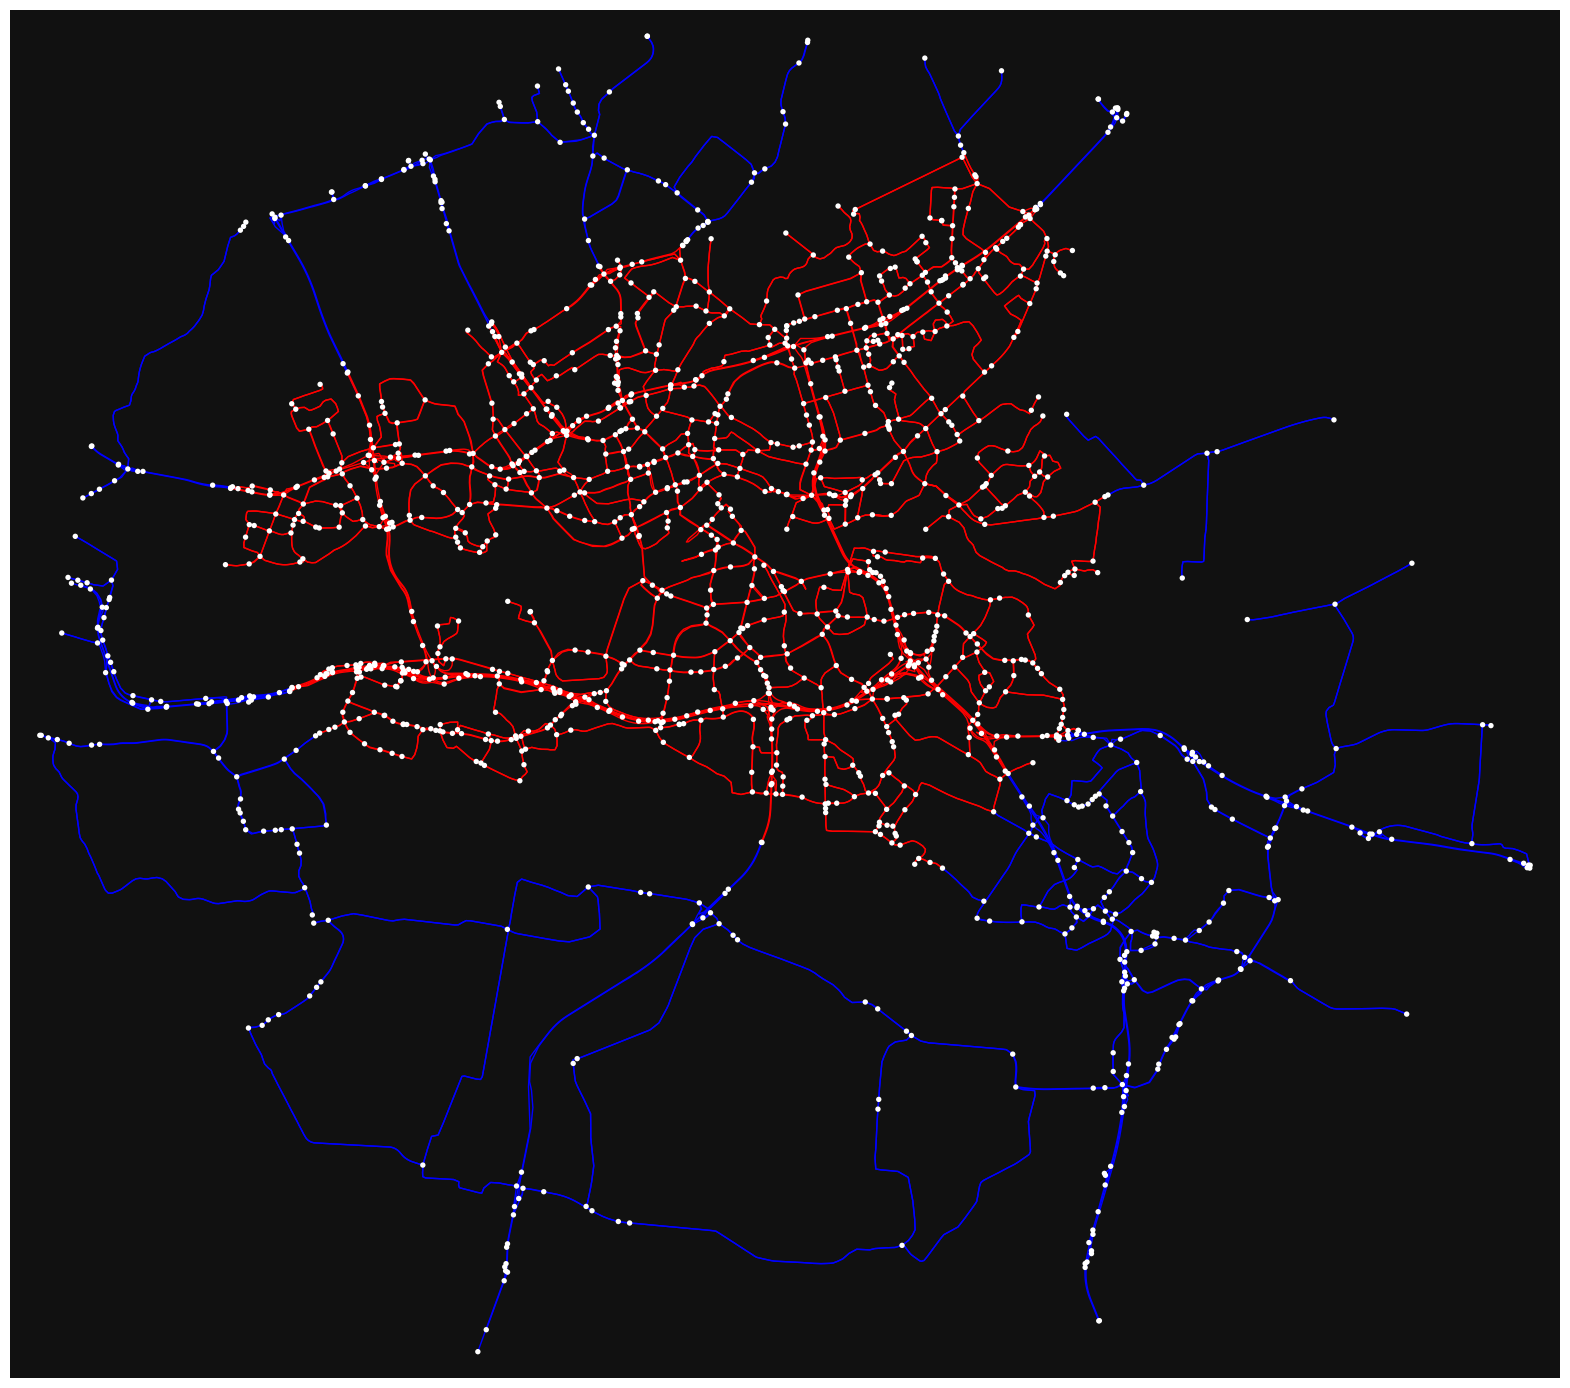

In [16]:
# The simplified_combined_network is now ready for further analysis or visualization
# Color edges based on the "network" attribute
fig, ax = ox.plot_graph(merged_network, edge_color=edge_colors, figsize=(20,20))

# Save the plot as a PNG file
fig.savefig("../img/merged_network.png", dpi=200, bbox_inches="tight")